In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from qvalue import estimate
from glob import iglob

In [68]:
# Load the ClinVar pathogenic results
cv  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-06/clinvar/pathogenic_K_summary.txt",delimiter='\t')
cv  = cv.drop_duplicates(["structid","chain"])
cv.ix[~cv[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(cv.ix[~cv[ "Kp"].isnull(), "Kp"].values)

In [69]:
# Load the HGMD AD results
ad  = pd.read_csv("/Volumes/doux/pdbmap/results/specialK_analysis_2016-08-09/hgmd_ad/aap_K_summary.txt",delimiter='\t')
ad  = ad.drop_duplicates(["structid","chain"])
ad.ix[~ad[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(ad.ix[~ad[ "Kp"].isnull(), "Kp"].values)

In [70]:
# Load the HGMD AR results
ar  = pd.read_csv("/Volumes/doux/pdbmap/results/specialK_analysis_2016-08-09/hgmd_ar/aap_K_summary.txt",delimiter='\t')
ar  = ar.drop_duplicates(["structid","chain"])
ar.ix[~ar[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(ar.ix[~ar[ "Kp"].isnull(), "Kp"].values)

/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

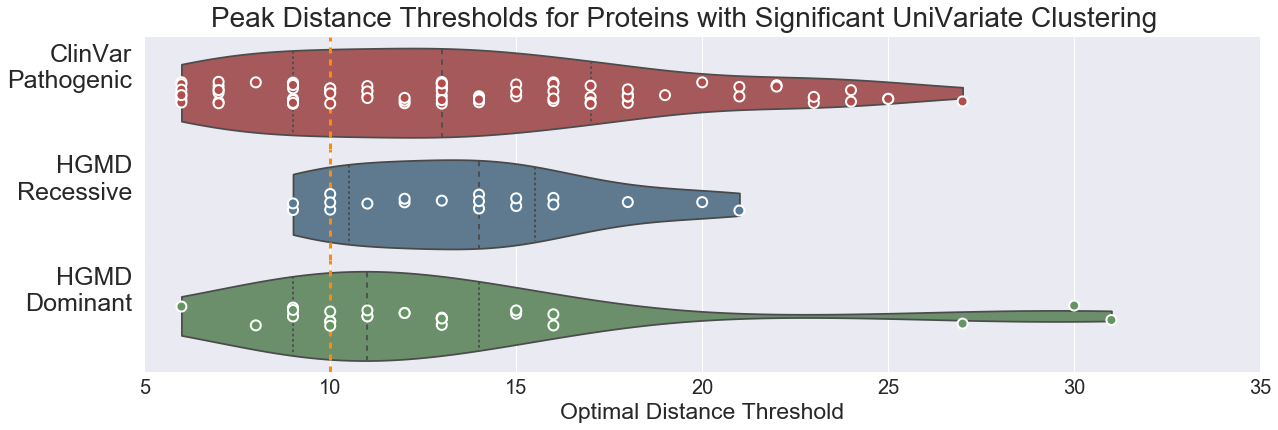

In [71]:
# Setup the plot
fig,ax = plt.subplots(3,1,figsize=(20,6),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC nsSNVs
df = cv[(cv["Kq"]<0.1) & (cv["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[0],scale='width',cut=0,ax=ax[0])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[0],orient='h',edgecolor='white',size=10,ax=ax[0])
# ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
ax[0].set_ylabel("ClinVar\nPathogenic",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = ar[(ar["Kq"]<0.1) & (ar["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[1],scale='width',cut=0,ax=ax[1])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[1],orient='h',edgecolor='white',size=10,ax=ax[1])
ax[1].set_ylabel("HGMD\nRecessive",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ClinVar pathogenic nsSNVs
df = ad[(ad["Kq"]<0.1) & (ad["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[2],scale='width',cut=0,ax=ax[2])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[2],orient='h',edgecolor='white',size=10,ax=ax[2])
ax[2].set_ylabel("HGMD\nDominant",fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Optimal Distance Threshold",fontsize=23)
for x in ax:
    x.axvline(x=10,c='darkorange',ls='dashed',lw=3)
plt.xlim([5,35])
plt.suptitle("Peak Distance Thresholds for Proteins with Significant UniVariate Clustering",fontsize=28,y=0.97)
plt.show()

In [72]:
from scipy.stats import mannwhitneyu
print "Mann-Whitney U Comparisons"
u,p = mannwhitneyu(cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"Kz"],ar.ix[(ar["Kq"]<0.1) & (ar["Kz"]>0),"Kz"])
print "ClinVar-Recessive:   p = %4.2g"%p
u,p = mannwhitneyu(cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"Kz"],ad.ix[(ad["Kq"]<0.1) & (ad["Kz"]>0),"Kz"])
print "ClinVar-Dominant:    p = %4.2g"%p
u,p = mannwhitneyu(ad.ix[(ad["Kq"]<0.1) & (ad["Kz"]>0),"Kz"],ar.ix[(ar["Kq"]<0.1) & (ar["Kz"]>0),"Kz"])
print "Dominant-Recessive:  p = %4.2g"%p

Mann-Whitney U Comparisons
ClinVar-Recessive:   p = 0.076
ClinVar-Dominant:    p = 0.43
Dominant-Recessive:  p = 0.26


In [73]:
print "Optimal Threshold Medians:"
print "ClinVar:    %2d"%cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"T"].median()
print "Recessive:  %2d"%ar.ix[(ar["Kq"]<0.1) & (ar["Kz"]>0),"T"].median()
print "Dominant:   %2d"%ad.ix[(ad["Kq"]<0.1) & (ad["Kz"]>0),"T"].median()

Optimal Threshold Medians:
ClinVar:    13
Recessive:  14
Dominant:   11


In [74]:
# What are the three AD outliers?
print ad.ix[(ad["Kq"]<0.1) & (ad["Kz"]>0) & (ad["T"]>25),["structid","chain","R","N","P","T","K","Kp","Kz"]]

   structid chain    R     N    P     T          K       Kp         Kz
62     4OG5     A  469  12.0  511  27.0   7.763712  0.02054   2.869670
76     1RY7     B  213  15.0  176  30.0  11.786582  0.02586   3.006735
98     1IIL     G  215  26.0  474  31.0  26.359302  0.00002  11.789923


In [75]:
# Now for the ExAC-relative MultiK

In [76]:
# Load the HGMD AD results
adm  = pd.read_csv("/Volumes/doux/pdbmap/results/multiK_analysis_2016-08-17/hgmd_ad-exac/hgmd_ad-exac_D_summary.txt",delimiter='\t')
adm  = adm.drop_duplicates(["sid","chain"])
adm.ix[~adm[ "p"].isnull(), "q"], K_lam, K_pi = estimate(adm.ix[~adm[ "p"].isnull(), "p"].values)

In [77]:
# Load the HGMD AR results
arm  = pd.read_csv("/Volumes/doux/pdbmap/results/multiK_analysis_2016-08-17/hgmd_ar-exac/hgmd_ar-exac_D_summary.txt",delimiter='\t')
arm  = arm.drop_duplicates(["sid","chain"])
arm.ix[~arm[ "p"].isnull(), "q"], K_lam, K_pi = estimate(arm.ix[~arm[ "p"].isnull(), "p"].values)

/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mikesivley/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

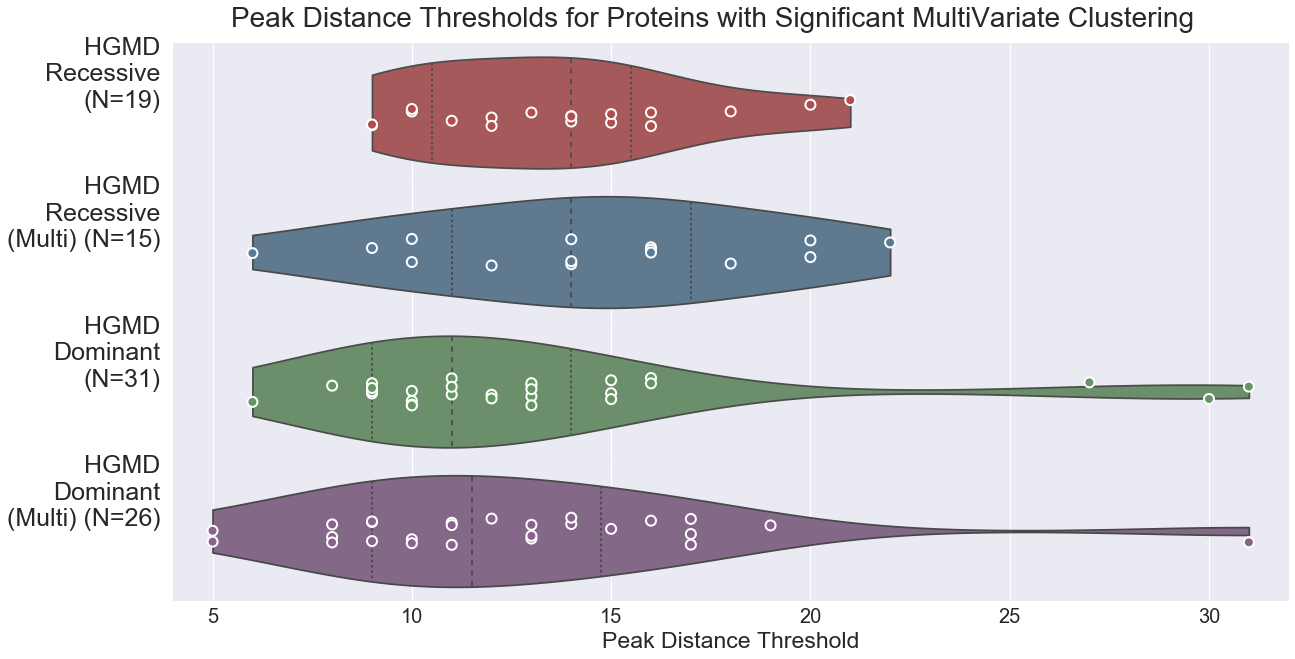

In [95]:
# Setup the plot
fig,ax = plt.subplots(4,1,figsize=(20,10),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=4, desat=.5))

# Plot the FDR-significant K for ExAC nsSNVs
df = ar[(ar["Kq"]<0.1) & (ar["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[0],scale='width',cut=0,ax=ax[0])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[0],orient='h',edgecolor='white',size=10,ax=ax[0])
# ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
ax[0].set_ylabel("HGMD\nRecessive\n(N=%d)"%len(df),fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for ExAC nsSNVs
df = arm[(arm["q"]<0.1) & (arm["z"]>0)]
df['dummy'] = ''
sns.violinplot(x='optT',y='dummy',data=df,inner='quart',color=pal[1],scale='width',cut=0,ax=ax[1])
sns.stripplot(x='optT',y='dummy',data=df,jitter=True,lw=2,color=pal[1],orient='h',edgecolor='white',size=10,ax=ax[1])
# ax[0].set_ylabel("ExAC\nMissense",fontsize=25,rotation='horizontal',ha='right')
ax[1].set_ylabel("HGMD\nRecessive\n(Multi) (N=%d)"%len(df),fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = ad[(ad["Kq"]<0.1) & (ad["Kz"]>0)]
df['dummy'] = ''
sns.violinplot(x='T',y='dummy',data=df,inner='quart',color=pal[2],scale='width',cut=0,ax=ax[2])
sns.stripplot(x='T',y='dummy',data=df,jitter=True,lw=2,color=pal[2],orient='h',edgecolor='white',size=10,ax=ax[2])
ax[2].set_ylabel("HGMD\nDominant\n(N=%d)"%len(df),fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(fontsize=20,handles=handles[:2])

# Plot the FDR-significant K for COSMIC somatic nsSNVs
df = adm[(adm["q"]<0.1) & (adm["z"]>0)]
df['dummy'] = ''
sns.violinplot(x='optT',y='dummy',data=df,inner='quart',color=pal[3],scale='width',cut=0,ax=ax[3])
sns.stripplot(x='optT',y='dummy',data=df,jitter=True,lw=2,color=pal[3],orient='h',edgecolor='white',size=10,ax=ax[3])
ax[3].set_ylabel("HGMD\nDominant\n(Multi) (N=%d)"%len(df),fontsize=25,rotation='horizontal',ha='right')
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(fontsize=20,handles=handles[:2])

plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Peak Distance Threshold",fontsize=23)
# for x in ax:
#     x.axvline(x=10,c='darkorange',ls='dashed',lw=3)
plt.xlim([4,32])
plt.suptitle("Peak Distance Thresholds for Proteins with Significant MultiVariate Clustering",fontsize=28,y=0.95)
plt.show()

In [96]:
from scipy.stats import mannwhitneyu
print "Mann-Whitney U Comparisons"
# u,p = mannwhitneyu(cv.ix[(cv["q"]<0.1) & (cv["z"]>0),"z"],arm.ix[(arm["q"]<0.1) & (arm["z"]>0),"z"])
# print "ClinVar-Recessive:   p = %4.2g"%p
# u,p = mannwhitneyu(cv.ix[(cv["q"]<0.1) & (cv["z"]>0),"z"],adm.ix[(adm["q"]<0.1) & (adm["z"]>0),"z"])
# print "ClinVar-Dominant:    p = %4.2g"%p
u,p = mannwhitneyu(adm.ix[(adm["q"]<0.1) & (adm["z"]>0),"z"],arm.ix[(arm["q"]<0.1) & (arm["z"]>0),"z"])
print "Dominant-Recessive:  p = %4.2g"%p

Mann-Whitney U Comparisons
Dominant-Recessive:  p = 0.074


In [94]:
print "Optimal Threshold Medians:"
# print "ClinVar:    %2d"%cv.ix[(cv["Kq"]<0.1) & (cv["Kz"]>0),"T"].median()
print "Recessive:  %2d"%arm.ix[(arm["q"]<0.1) & (arm["z"]>0),"optT"].median()
print "Dominant:   %2d"%adm.ix[(adm["q"]<0.1) & (adm["z"]>0),"optT"].median()

Optimal Threshold Medians:
Recessive:  14
Dominant:   11
